In [1]:
import flickrapi
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
import skimage.io
import skimage.transform
import requests
from io import BytesIO
import scipy
import scipy.ndimage
import math
import colorsys
import cv2
%matplotlib inline

In [2]:
nimage = 333;keyword = 'natural scenery'
img_a = np.zeros([nimage,224,224,3])
for i in range(nimage):
    inputImagePath = '{0:s}/{1:s}_{2:04d}.jpg'.format(keyword,keyword, i)  
    img_a[i] = cv2.imread(inputImagePath)

In [3]:
img_c = np.zeros([nimage,224,224,3])
d = np.zeros([nimage,224,224])
for i in range(nimage):
    d[i,:,:] = np.random.uniform(low=0.0, high=1.0, size=(224,224))
    t = np.exp(-d[i])
    a = 0.65
    b = 1
    A = np.random.uniform(low=a, high=b, size=(224,224))
    for k in range(0,3):
        img_c[i,:,:,k] = (img_a[i,:,:,k]/255)*t+A*(1-t)
    
    #cv2.imwrite("haze image/"+str(i)+".jpg", img_c[i]*255)





In [4]:
im=img_c*255
n = img_c.shape[0]
im1 = (im-np.min(im))/(np.max(im)-np.min(im))*255
im1 = im1.astype(np.uint8)
hsvI = im1

dc_max = np.zeros(img_c.shape[:3])
dc_min = np.zeros(img_c.shape[:3])
dc = np.zeros(img_c.shape[:3])
# dark = np.zeros(img_c.shape[:3])

for i in range(n):
    b,g,r = cv2.split(img_c[i])
    dc_min[i] = cv2.min(cv2.min(r,g),b)
    dc_max[i] = cv2.max(cv2.min(r,g),b)
    dc[i] =  dc_max[i] - dc_min[i] 
#     kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(224,224))
#     dark[i] = cv2.erode(dc_min[i],kernel)
    
    hsvI[i] = cv2.cvtColor(im1[i], cv2.COLOR_BGR2HSV)
    
s = hsvI[:,:,:,1] / 255.0
v = hsvI[:,:,:,2] / 255.0

# s2 = s*s
# v2 = v*v


In [5]:
sr = s.reshape([nimage*224*224])
vr = v.reshape([nimage*224*224])
dr = d.reshape([nimage*224*224])
# s2r = s2.reshape([nimage*224*224])
# v2r = v2.reshape([nimage*224*224])
#dcr = dc.reshape([nimage*224*224])
#dar = dark.reshape([nimage*224*224])
dmr = dc_min.reshape([nimage*224*224])

In [6]:
X = np.ones([nimage*224*224,3])
X[:,0] = vr
X[:,1] = sr
X[:,2] = dmr

D = dr.T
D = np.mat(D).T

In [10]:
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()
regr.fit(X,dr)
print('regr.intercept=',regr.intercept_)
print('regr.coef=',regr.coef_)


regr.intercept= 0.479486076361
regr.coef= [ 0.64872891 -0.88159268 -0.42438411]


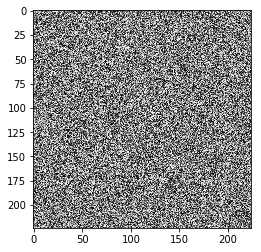

In [9]:
im = d[1]
im1 = (im-np.min(im))/(np.max(im)-np.min(im))*255
im1 = im1.astype(np.uint8)
plt.figure(1)
plt.imshow(im1,cmap='gray')